In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [19]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count_num = 1
set_num = 1

query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_name = []
lat = []
lng = []
date = []
country = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        
        print(f"Processing Record {count_num} of Set {set_num} | {city}")        
        
        count_num += 1
    except:
        print("City not found. Skipping...")
        pass
    
    if count_num == 51:
        set_num += 1
        count_num = 1
    
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')

Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | sur
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | vostok
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | vanimo
Processing Record 8 of Set 1 | port keats
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | porto novo
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | jalcocotan
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | saldanha
City not found. Skipping...
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | beira
Processing Record 18 of Set 1 | bako
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | breves
City not found. Skipping...
Processing Record 22 of Set 1 | nelson bay
Processing Record 23 of Set 1 | kapaa
P

Processing Record 37 of Set 4 | atbasar
Processing Record 38 of Set 4 | grants pass
City not found. Skipping...
Processing Record 39 of Set 4 | kudahuvadhoo
Processing Record 40 of Set 4 | brownsville
Processing Record 41 of Set 4 | sovetskiy
City not found. Skipping...
Processing Record 42 of Set 4 | jertih
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | port hedland
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | ipixuna
Processing Record 48 of Set 4 | mossendjo
Processing Record 49 of Set 4 | tekeli
Processing Record 50 of Set 4 | hirara
Processing Record 1 of Set 5 | san carlos del zulia
Processing Record 2 of Set 5 | salalah
City not found. Skipping...
Processing Record 3 of Set 5 | haltern
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | faro
Processing Record 6 of Set 5 | kazachinskoye
Processing Record 7 of Set 5

Processing Record 29 of Set 8 | zhigalovo
Processing Record 30 of Set 8 | marzuq
Processing Record 31 of Set 8 | deshnok
Processing Record 32 of Set 8 | gigmoto
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | gidam
City not found. Skipping...
Processing Record 35 of Set 8 | yamethin
Processing Record 36 of Set 8 | maldonado
City not found. Skipping...
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | piacabucu
Processing Record 39 of Set 8 | omboue
Processing Record 40 of Set 8 | unjha
Processing Record 41 of Set 8 | bilibino
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | gushikawa
Processing Record 44 of Set 8 | arman
Processing Record 45 of Set 8 | talaya
Processing Record 46 of Set 8 | carbondale
Processing Record 47 of Set 8 | taoudenni
Processing Record 48 of Set 8 | canutama
Processing Record 49 of Set 8 | bowen
Processing Record 50 of Set 8 | wattegama
City not found. Skipping...
Processing Record 1 of Set 9

In [22]:
weather = pd.DataFrame({
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
})

weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.70,170.31,-18.74,89,23,4.54,RU,1604463697
1,Hobart,-42.88,147.33,20.00,34,0,8.70,AU,1604464276
2,Sur,22.57,59.53,26.62,25,0,1.65,OM,1604464296
3,Tuatapere,-46.13,167.68,18.89,63,33,3.58,NZ,1604464092
4,Vostok,46.49,135.88,-5.58,83,26,6.71,RU,1604464296


In [26]:
weather.to_csv("weather_data.csv")

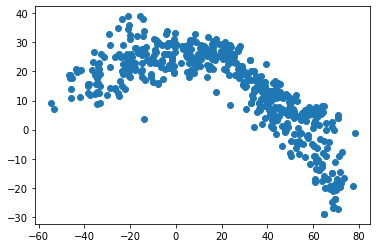

In [27]:
plt.scatter(weather["Lat"], weather["Max Temp"])

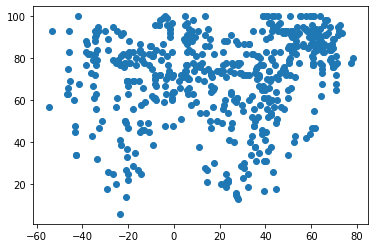

In [28]:
plt.scatter(weather["Lat"], weather["Humidity"])

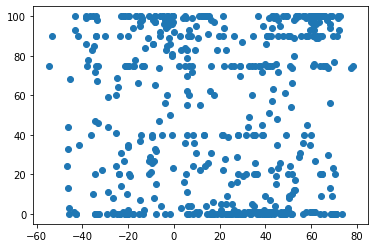

In [29]:
plt.scatter(weather["Lat"], weather["Cloudiness"])

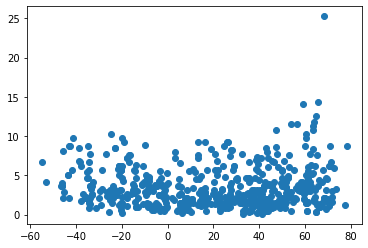

In [30]:
plt.scatter(weather["Lat"], weather["Wind Speed"])